# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sanjaya Cahyadi Fuad
- **Email:** m239b4ky4066@bangkit.academy
- **ID Dicoding:** sanjayacf

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan yang cukup besar dalam peminjaman sepeda berdasarkan apakah hari tersebut adalah hari libur (holiday), dan hari kerja (workingday)? Ditambah jika hari tersebut dipengaruhi oleh cuaca (weathersit)?

- Berapa banyak total sepeda (cnt) yang dipinjam dari tahun ke tahun? Dan apa yang membuat perbedaan tersebut?

## Import Semua Packages/Library yang Digunakan

In [125]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

**Memuat Dataset Pada Variablenya Masing-Masing.**

In [126]:
# Load Dataset day.csv dan hour.csv
day_data = pd.read_csv('Dataset/day.csv')
hour_data = pd.read_csv('Dataset/hour.csv')

**Menampilkan Informasi Dan Beberapa Row Dataset**

In [127]:
# Menampilkan informasi dan beberapa row pertama day.csv
day_data.info()
day_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [128]:
# Menampilkan informasi dan beberapa row pertama hour.csv
hour_data.info()
hour_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita melihat bahwa day.csv memiliki 731 entries dan 16 columns
- Dan hour.csv memiliki 17379 entries dan 17 columns

### Assessing Data

**Mengecek Value Kosong Pada Dataset**

In [129]:
# Cek jika ada row dengan value yang hilang pada setiap column dengan sum total value kosong
# pada day.csv dan hour.csv
print("day.csv:\n-----------------------------------------------------------------")
dayNullSum = day_data.isnull().sum()
print(dayNullSum)
print(f"Value Kosong pada day.csv\t: {sum(dayNullSum)}")

print("\n")

print("hour.csv:\n-----------------------------------------------------------------")
hourNullSum = hour_data.isnull().sum()
print(hourNullSum)
print(f"Value Kosong pada hour.csv\t: {sum(hourNullSum)}")

day.csv:
-----------------------------------------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Value Kosong pada day.csv	: 0


hour.csv:
-----------------------------------------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Value Kosong pada hour.csv	: 0


**Mengecek Duplikat Pada Dataset**

In [130]:
print(f"Duplikat pada day.csv\t: {day_data.duplicated().sum()}")
print(f"Duplikat pada hour.csv\t: {hour_data.duplicated().sum()}")

Duplikat pada day.csv	: 0
Duplikat pada hour.csv	: 0


**Statistik Dataset**

In [131]:
# Describe dataset untuk melihat distribusi data
print("Statistik untuk day.csv:")
print(day_data.describe())

Statistik untuk day.csv:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
st

In [132]:
print("Statistik untuk hour.csv:")
print(hour_data.describe())

Statistik untuk hour.csv:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.46

**Insight:**
- Pada data day.csv dan hour.csv diketahui jika tidak ada value yang kosong.
- Kedua data juga tidak memiliki duplikat.
- Serta tidak ada value yang tidak biasa berdasarkan describe().
- Namun diketahui column dteday memiliki tipe data object.

### Cleaning Data

**Mengkonversi Column Menjadi Tipe Data Yang Sesuai**

In [133]:
# Konversi column 'dteday' dari object menjadi datetime format pada kedua data.
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# tampilkan data yang sudah diubah.
# day_data.info()
# hour_data.info()
print("Data day.csv:\n-----------------------------------------------------------------")
day_data["dteday"].info()
print("\nData hour.csv:\n-----------------------------------------------------------------")
hour_data["dteday"].info()

Data day.csv:
-----------------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB

Data hour.csv:
-----------------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


**Insight:**
- Mengubah column dteday ke datetime membuat data jadi lebih mudah untuk dianalisa, seperti filtering range data, mengkalkulasi trend, atau bahkan bisa untuk resample data berdasarkan waktu period.

## Exploratory Data Analysis (EDA)

### Explore ...

*Melihat Perbandingan Peminjaman Sepeda Pada Tipe Hari Yang Berbeda Dan Pada Cuaca Yang Berbeda Pula**

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# data yang akan dipakai dari kedua dataset
data = day_data

# Set style plot
sns.set_theme(style="whitegrid")

# Buat kolum untuk holiday jika true, working day jika false, dan non-working day jika bukan working day juga.
data['day_type'] = data.apply(lambda row: 'Holiday' if row['holiday'] == 1 else ('Working Day' if row['workingday'] == 1 else 'Non-Working Day'), axis=1)

# group berdasarkan column baru dan kondisi cuaca.
daytype_weather = data.groupby(['day_type', 'weathersit'])['cnt'].mean().reset_index()

print(daytype_weather)

          day_type  weathersit          cnt
0          Holiday           1  4029.533333
1          Holiday           2  2998.666667
2  Non-Working Day           1  4646.602837
3  Non-Working Day           2  4024.781250
4  Non-Working Day           3  1815.400000
5      Working Day           1  5023.902280
6      Working Day           2  4075.028249
7      Working Day           3  1799.500000


In [135]:
# Cek apakah ada baris yang dimana adalah hari holiday dan cuaca nya adalah light snow/rain (3 dalam data).
holiday_snow_rain = data[(data['holiday'] == 1) & (data['weathersit'] == 3)]
holiday_snow_rain_count = holiday_snow_rain.shape[0]

print(f"Jumlah peminjaman sepeda pada hari holiday dengan cuaca light snow/rain: {holiday_snow_rain_count}")

Jumlah peminjaman sepeda pada hari holiday dengan cuaca light snow/rain: 0


**Insight:**
- Analisa ini menunjukan bahwa peminjaman sepeda cenderung lebih banyak pada hari kerja dan cuaca yang clear atau cerah dengan rata-rata 5023.902280.
- Fakta menariknya adalah analisa menunjukan peminjaman sepeda pada hari libur dengan cuaca hujan atau light snow adalah 0 setidaknya berdasarkan dataset.
- 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

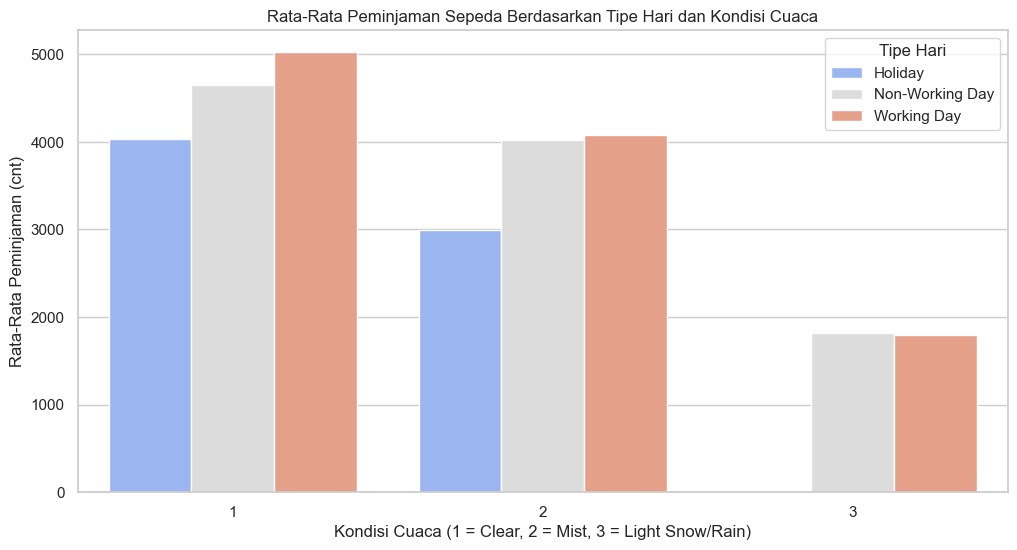

In [136]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', hue='day_type', data=daytype_weather, palette='coolwarm')
plt.title('Rata-Rata Peminjaman Sepeda Berdasarkan Tipe Hari dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Snow/Rain)')
plt.ylabel('Rata-Rata Peminjaman (cnt)')
plt.legend(title='Tipe Hari', loc='upper right')
plt.show()

### Pertanyaan 2:

     yr      cnt
0  2011  1243103
1  2012  2049576


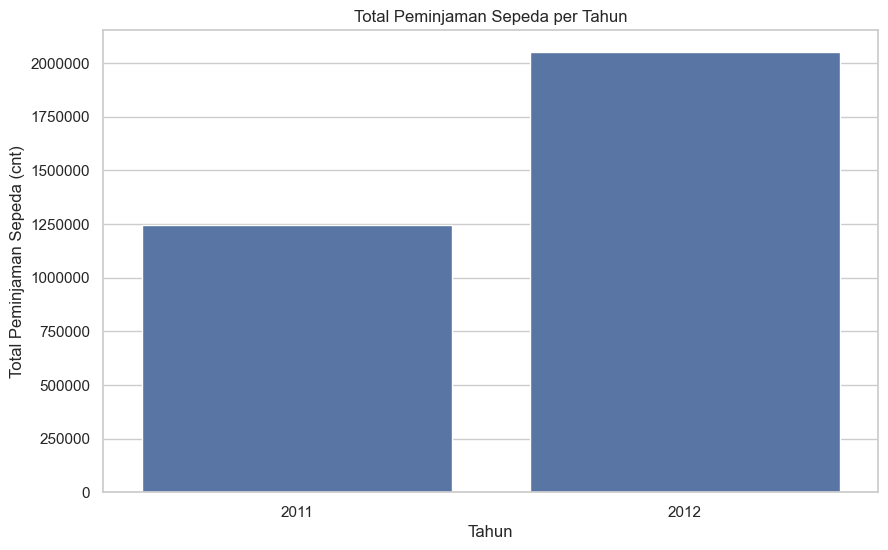

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total peminjaman sepeda per tahun
yearly_rentals = data.groupby('yr')['cnt'].sum().reset_index()

# Ubah nilai pada kolom 'yr' menjadi tahun sebenarnya (2011, 2012)
yearly_rentals['yr'] = yearly_rentals['yr'].map({0: 2011, 1: 2012})
print(yearly_rentals)

# Visualisasikan total peminjaman sepeda per tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='yr', y='cnt', data=yearly_rentals)

# Menampilkan angka tanpa notasi ilmiah
plt.ticklabel_format(style='plain', axis='y')

plt.title('Total Peminjaman Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjaman Sepeda (cnt)')
plt.show()


Jika dari yang dilihat sepertinya tahun 2012 mempunyai frekuensi yang sangat jauh dibanding pada tahun 2011, maka daripada itu kita akan menggunakan plot rata-rata peminjaman sepeda berdasarkan tipe hari dan cuaca untuk melihat yang membuat perbedaan signifikan tersebut.

     yr  weathersit      cnt
0  2011           1   835067
1  2011           2   382924
2  2011           3    25112
3  2012           1  1422885
4  2012           2   613934
5  2012           3    12757


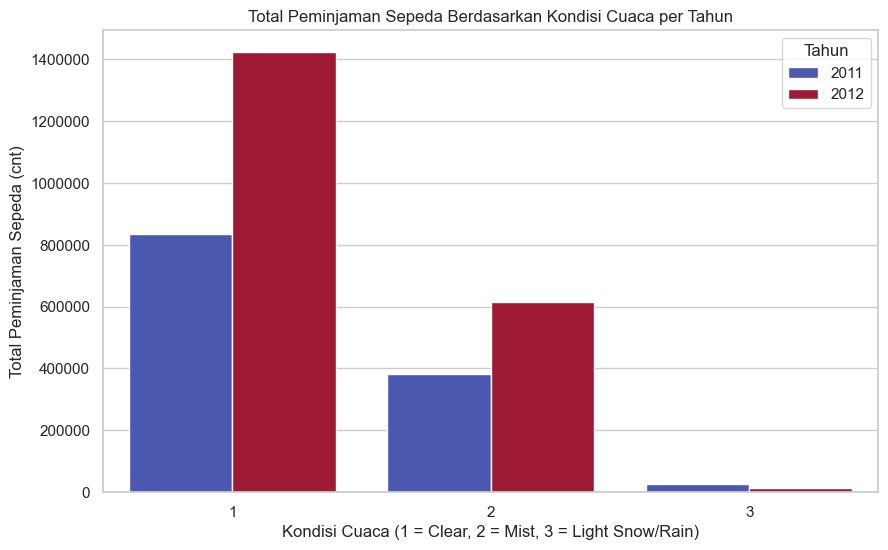

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan berdasarkan tahun dan kondisi cuaca
weather_rentals = data.groupby(['yr', 'weathersit'])['cnt'].sum().reset_index()
weather_rentals['yr'] = weather_rentals['yr'].map({0: 2011, 1: 2012})
print(weather_rentals)

# Visualisasikan total peminjaman sepeda berdasarkan kondisi cuaca per tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', hue='yr', data=weather_rentals, palette='coolwarm')

# Nonaktifkan notasi ilmiah di sumbu y
plt.ticklabel_format(style='plain', axis='y')

plt.title('Total Peminjaman Sepeda Berdasarkan Kondisi Cuaca per Tahun')
plt.xlabel('Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Snow/Rain)')
plt.ylabel('Total Peminjaman Sepeda (cnt)')
plt.legend(title='Tahun')
plt.show()


**Insight:**
- Untuk cuaca clear atau mist pada hari kerja adalah memiliki frekuensi paling tinggi kecuali pada kondisi cuaca light snow/rain.
- Diasumsikan alasan hari libur adalah hari dengan peminjaman sepeda terdikit adalah karena konsumen kebanyakan merupakan pekerja yang menyewa sepeda untuk sampai ke tempat kerja.
- 2012 menjadi tahun dimana total peminjaman sepeda adalah 2049576 dan 2011 dengan total 1243103 diasumsikan karena 2012 mempunyai cuaca clear atau cerah paling banyak daripada tahun 2011 yang dimana pekerja dapat dengan leluasa menyewa sepeda tanpa takut hujan.

## Analisis Lanjutan (Opsional)

## Conclusion

- 
- 